Step 1: This code implements a convolutional neural network (CNN) for image classification using Keras. It imports necessary modules, defines the model with layers like Convolution2D and Dense, and compiles it with various optimizers. The script preprocesses image data, shuffles and splits it, and evaluates the model's performance using metrics like classification_report and confusion_matrix. Overall, it establishes a framework for building, training, and assessing CNN models for image classification tasks.

In [38]:
#KERAS
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam, Adadelta
from keras import utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from PIL import Image
from numpy import *
#SKLEARN
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

Step 2: This code configures image dimensions and mounts Google Drive in Google Colab. It sets paths for the source folder with input images (path1) and the destination folder for resized images (path2). The print statement confirms successful path configuration.

In [39]:
# input image dimensions
img_rows, img_cols = 200, 200

#number of channels
img_channels = 1

from google.colab import drive
drive.mount('/content/gdrive')

path1 = "/content/gdrive/My Drive/Rice Leaf Diseases Detection"     #path of folder of images
path2 = "/content/gdrive/My Drive/resized_data"   #path of folder to save images
print("Directory path is set")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Directory path is set


Step 3: The code uses the os module to list the contents of the folder specified by path1, which contains images. The len function calculates the total number of items in the list, representing the number of raw images. The print statement outputs the count of raw images.

In [40]:
listing = os.listdir(path1)
num_samples=len(listing)
print ("Total number of raw images is {}".format(num_samples))

Total number of raw images is 2500



Step 4: This code iterates through each raw images, resizes it, converts it to grayscale, and saves it in a path2. The final list of filenames for the converted images is then printed.

In [41]:
for file in listing:
  im = Image.open(path1 + '/' + file)
  img = im.resize((img_rows, img_cols))
  gray = img.convert('L')
  gray.save(path2 + '/' + file, "JPEG")

imlist = os.listdir(path2)
print ("Raw images converted to following filenames {}".format(imlist))

Raw images converted to following filenames ['SB_ (31).jpg', 'SB_ (29).jpg', 'SB_ (17).jpg', 'LB_ (67).jpg', 'LB_ (224).jpg', 'LB_ (70).jpg', 'LB_ (66).jpg', 'SB_ (56).jpg', 'LB_ (72).jpg', 'LB_ (71).jpg', 'LB_ (226).jpg', 'LB_ (222).jpg', 'SB_ (49).jpg', 'LB_ (68).jpg', 'LB_ (65).jpg', 'LB_ (51).jpg', 'SB_ (58).jpg', 'LB_ (221).jpg', 'LB_ (225).jpg', 'LB_ (232).jpg', 'LB_ (69).jpg', 'LB_ (74).jpg', 'SB_ (39).jpg', 'LB_ (235).jpg', 'LB_ (63).jpg', 'SB_ (24).jpg', 'SB_ (22).jpg', 'LB_ (234).jpg', 'LB_ (228).jpg', 'LB_ (73).jpg', 'LB_ (77).jpg', 'LB_ (92).jpg', 'LB_ (227).jpg', 'SB_ (51).jpg', 'LB_ (233).jpg', 'LB_ (231).jpg', 'LB_ (75).jpg', 'LB_ (81).jpg', 'SB_ (26).jpg', 'SB_ (43).jpg', 'SB_ (25).jpg', 'LB_ (230).jpg', 'SB_ (36).jpg', 'LB_ (90).jpg', 'SB_ (46).jpg', 'LB_ (229).jpg', 'SB_ (18).jpg', 'LB_ (242).jpg', 'LB_ (244).jpg', 'LB_ (79).jpg', 'SB_ (41).jpg', 'LB_ (78).jpg', 'LB_ (241).jpg', 'LB_ (76).jpg', 'LB_ (91).jpg', 'LB_ (85).jpg', 'LB_ (236).jpg', 'LB_ (88).jpg', 'SB_ (54)

Step 5: Here, the code uses the array function from NumPy to open the first processed image from the path2 folder. It then extracts its dimensions using the shape attribute and calculates the total number of processed images by checking the length of the list of processed image filenames. The print statements output the count of processed images and a confirmation message.

In [42]:
im1 = array(Image.open(path2 + '/'+ imlist[0]))
m,n = im1.shape[0:2]
imnbr = len(imlist)

print(imnbr)
print("Total number of processed images is {}".format(imnbr))

2500
Total number of processed images is 2500



Step 6: The code creates a flattened matrix from processed images and prints its shape and content. It then assigns labels to the images based on specified categories, forming a label array with its shape and content also printed.

In [43]:
immatrix = array([array(Image.open(path2 + '/'+ im2)).flatten() for im2 in imlist],'f')

print("Matrix shape is {}".format(immatrix.shape))
print(immatrix)

label=np.ones((num_samples,),dtype = int)
label[0:500]=0 #sheath Blight
label[501:1000]=1 #Rice Hispa
label[1001:1500]=2 #Leaf Blast
label[1501:2000]=3 #Brown Spot
label[2001:2500]=4 #Bacterial Leaf Blight

print("Label shape is {}".format(label.shape))
print(label)

Matrix shape is (2500, 40000)
[[193. 176. 159. ... 127. 152. 131.]
 [206. 195. 188. ... 146. 142. 139.]
 [100. 122. 126. ... 121. 115. 114.]
 ...
 [  7.  20.  31. ...  73.  48.  27.]
 [ 52.  54.  46. ... 113. 101. 105.]
 [112. 106. 104. ...  80.  79.  77.]]
Label shape is (2500,)
[0 0 0 ... 4 4 4]


Step 7: The code shuffles the flattened image matrix and its labels. It combines them into a train_data list. The code then selects and displays a reshaped image from the shuffled data. Finally, it prints relevant information about the train_data list for verification.

[array([[208., 209., 211., ..., 188., 191., 198.],
       [151., 163., 152., ..., 150., 150., 150.],
       [ 79.,  79.,  79., ..., 137., 132., 129.],
       ...,
       [117., 125., 126., ..., 120., 120., 120.],
       [ 62.,  65.,  59., ..., 165., 167., 168.],
       [ 85.,  87.,  89., ..., 116., 116., 120.]], dtype=float32), array([2, 4, 3, ..., 2, 4, 3])]
[array([[208., 209., 211., ..., 188., 191., 198.],
       [151., 163., 152., ..., 150., 150., 150.],
       [ 79.,  79.,  79., ..., 137., 132., 129.],
       ...,
       [117., 125., 126., ..., 120., 120., 120.],
       [ 62.,  65.,  59., ..., 165., 167., 168.],
       [ 85.,  87.,  89., ..., 116., 116., 120.]], dtype=float32), array([2, 4, 3, ..., 2, 4, 3])]
[[208. 209. 211. ... 188. 191. 198.]
 [151. 163. 152. ... 150. 150. 150.]
 [ 79.  79.  79. ... 137. 132. 129.]
 ...
 [117. 125. 126. ... 120. 120. 120.]
 [ 62.  65.  59. ... 165. 167. 168.]
 [ 85.  87.  89. ... 116. 116. 120.]]
[2 4 3 ... 2 4 3]


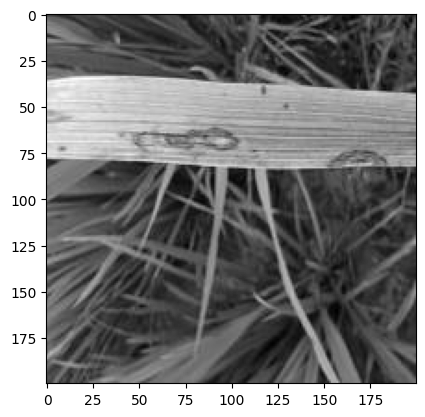

In [ ]:
data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]

img=immatrix[67].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')
print(train_data)
print (train_data)
print (train_data[0])
print (train_data[1])

Step 8: The code assigns variables to the components of train_data and prints their content. It splits the data into training and testing sets, reshapes them for the CNN model, and normalizes pixel values. Finally, it prints the shapes and sample counts of the sets, completing the data preparation for CNN training.

In [ ]:
(X, y) = (train_data[0], train_data[1])
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


print('X_train:', X_train)
print('y_train :', y_train)
print('X_test :', X_test)
print('y_test:', y_test)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train / 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

[[208. 209. 211. ... 188. 191. 198.]
 [151. 163. 152. ... 150. 150. 150.]
 [ 79.  79.  79. ... 137. 132. 129.]
 ...
 [117. 125. 126. ... 120. 120. 120.]
 [ 62.  65.  59. ... 165. 167. 168.]
 [ 85.  87.  89. ... 116. 116. 120.]]
[2 4 3 ... 2 4 3]
X_train: [[ 66.  66.  66. ... 184. 185. 189.]
 [ 88.  92.  99. ...  59.  60.  60.]
 [ 91.  87.  77. ... 160. 156. 152.]
 ...
 [124. 113.  96. ... 150. 166. 110.]
 [ 25.  25.  26. ...  81.  85.  94.]
 [181. 180. 175. ...  96. 110.  97.]]
y_train : [4 0 3 ... 1 1 1]
X_test : [[145. 151. 154. ... 128. 106.  87.]
 [ 64.  64.  64. ... 111. 113. 111.]
 [ 96. 128. 158. ...  73.  66.  60.]
 ...
 [111. 113. 115. ...  73.  72.  70.]
 [163. 165. 167. ...  86. 128. 149.]
 [188. 188. 186. ...  75.  75.  75.]]
y_test: [1 4 1 1 1 2 1 3 1 2 1 3 0 0 4 2 2 4 4 1 1 0 0 0 4 0 2 4 4 2 1 0 1 0 0 4 1
 3 3 0 2 0 0 3 3 1 2 0 4 1 1 1 1 0 4 2 0 1 4 4 0 4 1 2 0 0 4 1 2 3 3 0 3 1
 3 0 1 3 1 4 2 2 1 1 3 3 1 0 3 3 1 2 4 1 3 4 0 3 4 1 2 0 1 3 3 0 1 3 0 1 0
 3 2 0 1 4 4 0 4 3 

Step 9: The code prints the original labels of the training and testing sets and converts them into binary class matrices. It then displays the label of a specific image from the original training data.

y_train: [4 0 3 ... 1 1 1]
y_test: [1 4 1 1 1 2 1 3 1 2 1 3 0 0 4 2 2 4 4 1 1 0 0 0 4 0 2 4 4 2 1 0 1 0 0 4 1
 3 3 0 2 0 0 3 3 1 2 0 4 1 1 1 1 0 4 2 0 1 4 4 0 4 1 2 0 0 4 1 2 3 3 0 3 1
 3 0 1 3 1 4 2 2 1 1 3 3 1 0 3 3 1 2 4 1 3 4 0 3 4 1 2 0 1 3 3 0 1 3 0 1 0
 3 2 0 1 4 4 0 4 3 4 3 2 1 2 4 2 4 4 4 0 4 3 1 1 1 1 2 0 2 2 4 4 2 4 3 4 1
 4 1 4 0 4 2 3 3 4 1 0 2 2 1 3 2 0 2 1 2 4 0 0 0 4 3 1 3 1 4 2 4 2 2 1 4 2
 2 3 3 0 0 0 0 0 4 3 3 4 2 3 3 1 0 2 4 1 0 3 0 2 1 2 4 0 2 3 3 4 1 3 4 4 4
 4 2 3 2 0 0 2 3 2 2 3 4 1 2 2 4 3 1 4 0 3 2 1 0 3 0 3 0 4 3 2 1 3 1 3 2 3
 4 1 4 3 4 1 2 1 4 4 3 3 0 1 4 0 1 2 4 2 1 4 1 3 3 2 3 0 4 2 0 1 3 2 4 1 1
 3 4 4 0 1 2 0 0 3 0 0 0 2 3 3 1 3 1 1 2 1 0 2 3 0 0 0 3 0 0 3 2 2 4 4 1 4
 1 3 4 0 3 1 3 2 2 1 2 0 1 4 2 4 1 3 3 3 2 1 1 3 2 0 3 2 4 1 3 1 0 2 4 3 1
 0 4 2 0 2 4 1 4 2 1 0 1 2 0 2 1 4 0 2 3 3 3 1 3 4 2 1 2 2 3 2 0 3 1 1 1 4
 2 2 4 1 2 3 3 3 4 1 3 4 1 3 0 3 2 4 2 1 4 2 4 2 0 4 0 3 2 4 3 0 2 1 1 2 4
 0 1 2 4 0 3 0 2 3 1 3 4 3 0 1 3 2 4 2 1 0 3 2 0 3 4 1 0 3 3 3 4 

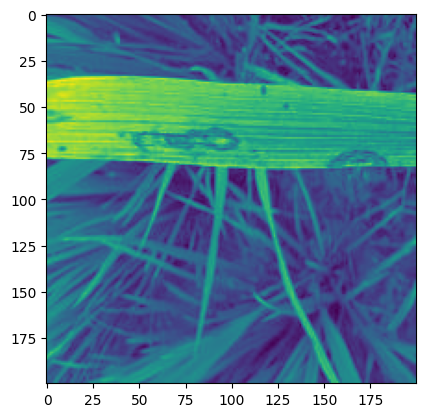

In [ ]:
print("y_train:",y_train)
print("y_test:",y_test)
nb_classes = 5
# convert class vectors to binary class matrices
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

print("y_train:",Y_train)
print("y_test:",Y_test)

i = 10
img=immatrix[67].reshape(img_rows,img_cols)
plt.imshow(img)
print("label of this image is: ", Y_train[i,:])


Step 10: The code sets up a CNN model using Keras with convolutional, max-pooling, dropout, and fully connected layers. It is compiled with the Adadelta optimizer, categorical crossentropy loss, and accuracy metric, establishing the architecture and configurations for training.

In [ ]:
#number of convolutional filters to use.
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3
#batch_size to train
batch_size = 32
# number of epochs to train
nb_epoch = 20
from tensorflow.keras.layers import BatchNormalization

# Step 10 (Modified)
model = Sequential()
model.add(Convolution2D(64, 3, 3, activation='relu', padding='valid', input_shape=(img_rows, img_cols, 1)))
model.add(BatchNormalization())
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


Step 11: The code initiates the training of the CNN model using the fit function. It specifies the batch size, number of epochs, and training data. The training progress is stored in the hist variable. This step executes the training process for the defined number of epochs, updating the models weights based on the provided training data and labels.

In [ ]:
#batch_size to train
batch_size = 32
# number of epochs to train
nb_epoch = 20
hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
63/63 [==============================] - 28s 404ms/step - loss: 2.4366 - accuracy: 0.2640 - val_loss: 2.2971 - val_accuracy: 0.1980
Epoch 2/20
63/63 [==============================] - 35s 557ms/step - loss: 1.8622 - accuracy: 0.3855 - val_loss: 2.6365 - val_accuracy: 0.1980
Epoch 3/20
63/63 [==============================] - 28s 452ms/step - loss: 1.6877 - accuracy: 0.4210 - val_loss: 3.3078 - val_accuracy: 0.1980
Epoch 4/20
63/63 [==============================] - 26s 408ms/step - loss: 1.4792 - accuracy: 0.4835 - val_loss: 3.7432 - val_accuracy: 0.1980
Epoch 5/20
63/63 [==============================] - 27s 433ms/step - loss: 1.2464 - accuracy: 0.5405 - val_loss: 2.6744 - val_accuracy: 0.2040
Epoch 6/20
63/63 [==============================] - 27s 424ms/step - loss: 1.1669 - accuracy: 0.5690 - val_loss: 3.3283 - val_accuracy: 0.1980
Epoch 7/20
63/63 [==============================] - 26s 412ms/step - loss: 0.9914 - accuracy: 0.6320 - val_loss: 3.3704 - val_accuracy: 0.1980

Step 12: This code visualizes the training and validation loss also the accuracy over epochs. It extracts these metrics from the training history and plots them using Matplotlib. Two figures are created, one for loss and another for accuracy, with labels, titles, and legends to facilitate interpretation.







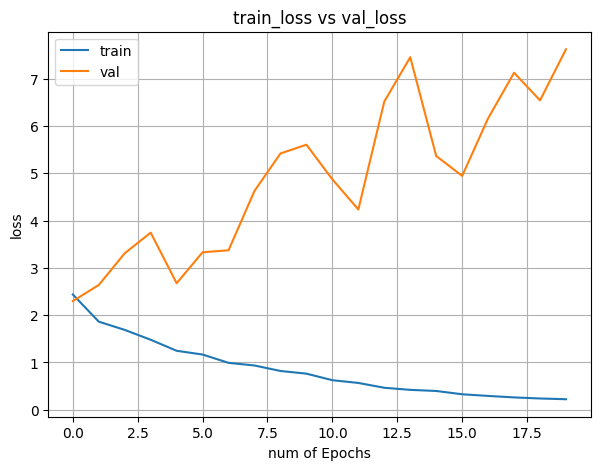

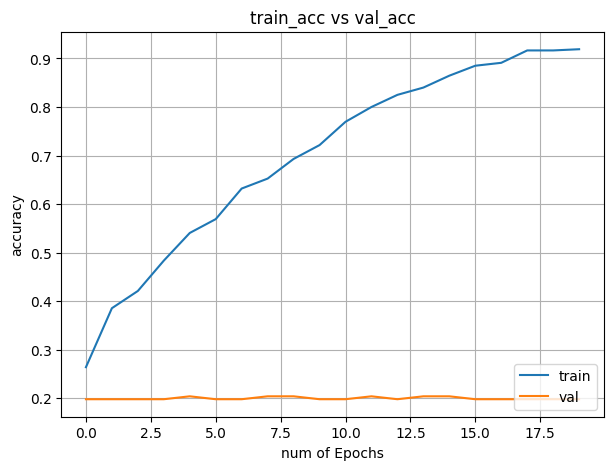

In [ ]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(nb_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train', 'val'])
#print (plt.style.available use bah, classic, ggplot for big pictures)
#plt.style.use(['classic'])

plt.figure(2, figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train', 'val'], loc=4)
#print plt.style.available #use bah, classic, ggplot for big pictures.
#plt.style.use(['classic'])

Step 13: This code performs Stratified K-Fold Cross-Validation with 10 folds. Within the loop, it reshapes the data, compiles, and trains the model on each fold. The training history is stored for analysis. After completing the folds, the final model is trained using all the data.

In [45]:
from sklearn.model_selection import StratifiedKFold

# Number of folds for cross-validation
num_folds = 10
# Declare an empty list to store training histories
history_list = []
# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Loop through the folds
for fold,(train_index, val_index) in enumerate(skf.split(X, y)):
  print(f"Training on fold {fold + 1}/{num_folds}...")

# Split the data into training and validation sets
X_fold_train, X_fold_val= X[train_index], X[val_index]
y_fold_train, y_fold_val = y[train_index], y[val_index]

#Reshape the data for the CNN
X_fold_train = X_fold_train.reshape(X_fold_train.shape[0], img_rows, img_cols, 1)
X_fold_val = X_fold_val.reshape(X_fold_val.shape[0], img_rows, img_cols, 1)

model.compile(optimizer=keras.optimizers.Adadelta (learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
nb_classes = 5
# convert class vectors to binary class matrices
y_train = utils.to_categorical(y_fold_train, nb_classes)
y_val = utils.to_categorical(y_fold_val, nb_classes)
# Train the model on this fold
history = model.fit(X_fold_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_fold_val, y_val))
# Append the training history to the list
# You can use this history to analyze the training process, e.g., plot training curves
history_list.append(history)
#Train the final model using all the data
# print("Training the final KFold model (KFmodel) using all data...")
model.fit(X.reshape(X.shape[0], img_rows, img_cols, 1), utils.to_categorical(y, nb_classes), batch_size=batch_size, epochs=nb_epoch, verbose=0)
print("Final KFold model (KFmodel) training complete!")

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...
Epoch 1/20
71/71 [==============================] - 36s 420ms/step - loss: 0.6038 - accuracy: 0.8333 - val_loss: 0.3087 - val_accuracy: 0.9120
Epoch 2/20
71/71 [==============================] - 28s 391ms/step - loss: 0.5651 - accuracy: 0.8373 - val_loss: 0.3026 - val_accuracy: 0.9080
Epoch 3/20
71/71 [==============================] - 27s 377ms/step - loss: 0.5818 - accuracy: 0.8360 - val_loss: 0.3011 - val_accuracy: 0.9080
Epoch 4/20
71/71 [==============================] - 28s 401ms/step - loss: 0.5980 - accuracy: 0.8324 - val_loss: 0.3002 - val_accuracy: 0.9080
Epoch 5/20
71/71 [==============================] - 27s 374ms/step - loss: 0.5774 - accuracy: 0.8307 - val_loss: 0.3001 - val_accuracy: 0.9080
Epoch 6/20
71/71 [================

Step 14: This code plots training history for each fold, calculates and displays the average training accuracy, and retrieves and averages weights for the final model. The final model is then compiled using averaged weights for improved generalization. This step provides insights into training progress and sets up the final model for evaluation.







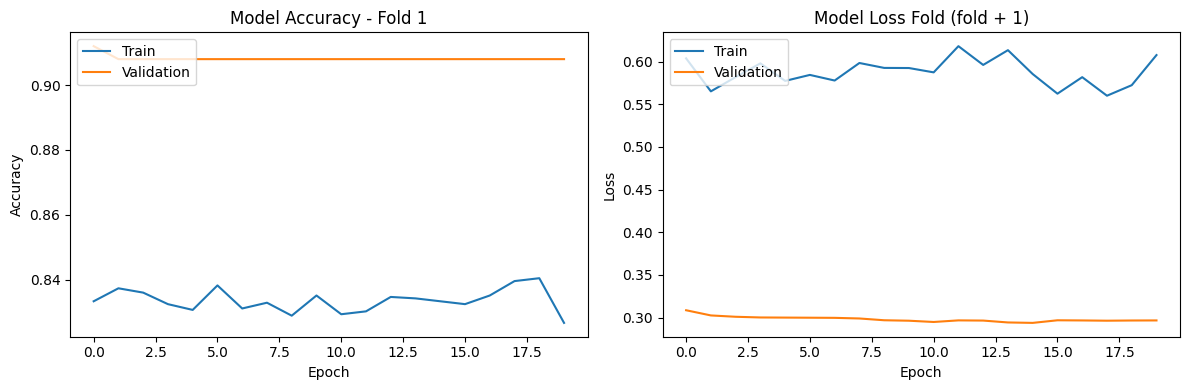



Average Training Accuracy Across Folds: {average_training_accuracy:.4f}




ValueError: ignored

In [51]:
#Initialize a list to store training accuracies for each fold
training_accuracies = []
#Plot training history for each fold
for fold, history in enumerate(history_list):
  plt.figure(figsize=(12, 4))

#Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title(f'Model Accuracy - Fold {fold + 1}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Fold (fold + 1)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

#Calculate and store training accuracy for this fold
training_accuracies.append(history.history['accuracy'][-1])

plt.tight_layout()
plt.show()

#Calculate and display the average training accuracy
average_training_accuracy = sum(training_accuracies) / len(training_accuracies)
print(f'\n{"="*40}\n')
print('Average Training Accuracy Across Folds: {average_training_accuracy:.4f}')
print(f'\n{"="*40}\n')
# Retrieve and average the weights
for fold, history in enumerate(history_list):
    # Retrieve the weights from each model
    fold_weights = model.get_weights()

    # Initialize or accumulate the weights for averaging
    if fold == 0:
       average_weights = fold_weights
    else:
       average_weights = [np.add(average_weights[i], fold_weights[i]) for i in range(len(average_weights))]

# Average the weights
average_weights = [np.divide(weight, num_folds) for weight in average_weights]

# Set the weights of the final model
final_model = Sequential()

final_model.add(Convolution2D(64, 3, 3, activation='relu', padding='valid', input_shape=(img_rows, img_cols, 1)))
final_model.add(Convolution2D(64, 3, 3, activation='relu'))
final_model.add(MaxPooling2D(pool_size=(2, 2)))
final_model.add(Dropout(0.5))

final_model.add(Convolution2D(128, 3, 3, activation='relu', padding='same'))
final_model.add(Convolution2D(128, 3, 3, activation='relu'))
final_model.add(MaxPooling2D(pool_size=(2, 2)))
final_model.add(Dropout(0.5))

final_model.add(Flatten())
final_model.add(Dense(256, activation='relu'))
final_model.add(Dropout(0.5))
final_model.add(Dense(256, activation='relu'))
final_model.add(Dropout(0.5))
final_model.add(Dense(nb_classes, activation='softmax'))

# Set the averaged weights
final_model.set_weights(average_weights)

# Compile the final model
final_model.compile(optimizer=keras.optimizers.Adadelta(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
print("Final Model is Successfully Set and Compiled")


Step 15: This code evaluates the model's performance on the test set, printing the test loss and accuracy. It then predicts labels for the test set and prints the classification report and confusion matrix.







In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(model.metrics_names)
print(score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(Y_test)
Y_pred= model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
target_names = ['class (Comfort)', 'class 1(Discomfort)', 'class 2(Distressed)', 'class 3(Happy)']
print("Performance report for Hold-out method training: \n",classification_report(np.argmax(Y_test,axis=1), y_pred, target_names=target_names))
print("Confusion Matrix: \n",confusion_matrix(np.argmax(Y_test, axis=1), y_pred))

Step 16: This code evaluates the final model's performance on the test set, printing the test loss and accuracy. It then predicts labels for the test set and prints the classification report and confusion matrix. This step provides a comprehensive assessment of the final model's performance on the held-out test data, considering the averaged weights from the Stratified K-Fold Cross-Validation.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

score = final_model.evaluate(X_test, Y_test, verbose=0)
print(final_model.metrics_names)
print(score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(Y_test)
Y_pred = final_model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
target_names = ['class (Comfort)', 'class 1(Discomfort)', 'class 2(Distressed)', 'class 3(Happy)']
print("Performance report: \n", classification_report(np.argmax(Y_test,axis=1), y_pred,target_names=target_names))
print("Confusion Matrix: \n", confusion_matrix(np.argmax(Y_test, axis=1), y_pred))
